In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nawinrajkumars","key":"04d5ce1a6b64c959b7a52a5365d3ba32"}'}

In [2]:
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [3]:
!kaggle competitions download -c spaceship-titanic


spaceship-titanic.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
!unzip leaf-classification.zip

unzip:  cannot find or open leaf-classification.zip, leaf-classification.zip.zip or leaf-classification.zip.ZIP.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv("/content/train.csv")

In [3]:
train_data.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [4]:
split = pd.DataFrame(train_data['PassengerId'].str.split('_',expand=True))

In [5]:
train_data['HasFamily'] = split[0].duplicated()
  

In [23]:
train_data['Cabin'].duplicated().value_counts()

False    6561
True     2132
Name: Cabin, dtype: int64

In [7]:
for i in range(len(train_data.HasFamily)-1):
  if train_data.at[i,'HasFamily'] == True:
    train_data.at[i-1,'HasFamily'] = True



In [8]:
df = pd.DataFrame(train_data[train_data['VIP'] ==  True])
df2 = pd.DataFrame(train_data[train_data['VIP'] ==  False])

In [9]:
VIP_avg = ((train_data[train_data['VIP'] ==  True].FoodCourt + train_data[train_data['VIP'] ==  True].ShoppingMall + train_data[train_data['VIP'] ==  True].Spa + train_data[train_data['VIP'] ==  True].VRDeck)/5).mean()
non_VIP_avg = ((train_data[train_data['VIP'] ==  False].FoodCourt + train_data[train_data['VIP'] ==  False].ShoppingMall + train_data[train_data['VIP'] ==  False].Spa + train_data[train_data['VIP'] ==  False].VRDeck)/5).mean() 

In [10]:
print((VIP_avg,non_VIP_avg))

(824.6483516483516, 239.2638965835642)


In [11]:
train_data.VIP.value_counts(dropna = False)

False    8291
NaN       203
True      199
Name: VIP, dtype: int64

In [12]:
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].mean())
train_data['RoomService'] = train_data['RoomService'].fillna(train_data['RoomService'].mean())
train_data['FoodCourt'] = train_data['FoodCourt'].fillna(train_data['FoodCourt'].mean())
train_data['ShoppingMall'] = train_data['ShoppingMall'].fillna(train_data['ShoppingMall'].mean())
train_data['Spa'] = train_data['Spa'].fillna(train_data['Spa'].mean())
train_data['VRDeck'] = train_data['VRDeck'].fillna(train_data['VRDeck'].mean())

Filling the null values of VIP column by finding the mean of the expenses by finding the mean of 5 columns.


In [13]:
for i in range(len(train_data)):
  if train_data.loc[i].isnull()['VIP'] == True:
    dff = ((train_data.loc[i]['RoomService'] + train_data.loc[i]['FoodCourt'] + train_data.loc[i]['ShoppingMall'] + train_data.loc[i]['Spa'] + train_data.loc[i]['VRDeck']) / 5)
    if dff > 500:
      train_data.at[i,'VIP'] = True
    else:
      train_data.at[i,'VIP'] = False
  else:
    continue
   


In [14]:
train_data.VIP.value_counts(dropna = False)

False    8470
True      223
Name: VIP, dtype: int64

In [15]:
train_data.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
HasFamily         0
dtype: int64

In [18]:
train_data['Name']

In [19]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [20]:
train_data['Destination'] = label_encoder.fit_transform(train_data['Destination'])

In [21]:
train_data['HomePlanet'] = label_encoder.fit_transform(train_data['HomePlanet'])

In [22]:
train_data['Cabin'] = label_encoder.fit_transform(train_data['Cabin'])

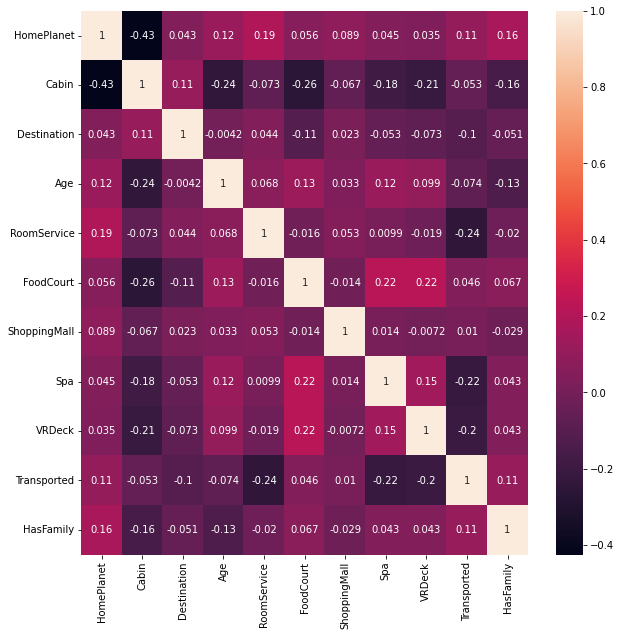

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(train_data.corr(), annot=True)

In [34]:
train_data.isnull().sum()

HomePlanet      0
CryoSleep       0
Cabin           0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
HasFamily       0
dtype: int64

In [35]:
train_data.CryoSleep.astype(bool).corr(train_data.Transported)

0.48180202388233795

Filling null values of Cryo Sleep using the Transported Column as there is a  posititve correlation between these two columns.

In [36]:
for i in range(len(train_data)):
  if train_data.loc[i].isnull()['CryoSleep'] == True:
    if train_data.loc[i]['Transported'] == True:
      train_data.at[i, 'CryoSleep'] = True
    else:
      train_data.at[i, 'CryoSleep'] = False

In [32]:
del train_data['Destination']

In [33]:
y = []
for i in range(len(x)):
  if x[i][0] == x[i+1][0]:
    y.append(True)
  elif i !=0 and x[i][0] == x[i-1][0]:
    y.append(True)    
  else:
    y.append(False)


KeyError: ignored

In [37]:
train_data.isnull().sum()

HomePlanet      0
CryoSleep       0
Cabin           0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
HasFamily       0
dtype: int64

In [48]:
train_data['Expenses'] = train_data['RoomService'] + train_data['FoodCourt'] + train_data['ShoppingMall'] + train_data['VRDeck'] + train_data['Spa'] 

In [52]:
X = train_data.drop(["Transported","Cabin","RoomService","FoodCourt","ShoppingMall","VRDeck","Spa"],axis =1)
Y = pd.DataFrame(train_data['Transported'])

In [53]:
X.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   HomePlanet  8693 non-null   int64  
 1   CryoSleep   8693 non-null   object 
 2   Age         8693 non-null   float64
 3   VIP         8693 non-null   object 
 4   HasFamily   8693 non-null   bool   
 5   Expenses    8693 non-null   float64
dtypes: bool(1), float64(2), int64(1), object(2)
memory usage: 348.2+ KB


In [54]:
X['VIP'] = X['VIP'].astype(bool)
X['CryoSleep'] = X['CryoSleep'].astype(bool)


In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=0)


In [56]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [57]:
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier()

In [58]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [value for value in y_pred]


In [59]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 74.18%
